# Exercise 5:
***

## 1. 

In [1]:
import numpy as np
import pandas as pd

In [2]:
!wget https://www.dropbox.com/s/xvjzaxzz3ysphme/data_000637.txt -P ~/data/

--2021-11-27 15:05:24--  https://www.dropbox.com/s/xvjzaxzz3ysphme/data_000637.txt
Resolving www.dropbox.com... 162.125.69.18
Connecting to www.dropbox.com|162.125.69.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/xvjzaxzz3ysphme/data_000637.txt [following]
--2021-11-27 15:05:24--  https://www.dropbox.com/s/raw/xvjzaxzz3ysphme/data_000637.txt
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc9ce6b93c29004d4340de7df64e.dl.dropboxusercontent.com/cd/0/inline/BawnYb5gYaQtnS-3ypXdMZ2F3D_EJnSGL3q9ChNT47h36haubtS-7TLYs8dmfLCxiGLQifPjy5-SqT67ieFTMDj7NOpEfrsL69RSdgG8XtncEYU-Syluq5MD9d6aMJsEQ5uGIEyhe1BaVXDfsgGEoYRF/file# [following]
--2021-11-27 15:05:24--  https://uc9ce6b93c29004d4340de7df64e.dl.dropboxusercontent.com/cd/0/inline/BawnYb5gYaQtnS-3ypXdMZ2F3D_EJnSGL3q9ChNT47h36haubtS-7TLYs8dmfLCxiGLQifPjy5-SqT67ieFTMDj7NOpEfrsL69RSdgG8XtncEYU-Syluq5MD9d6aMJsEQ5uGIEyhe1BaVXD

In [2]:
counter = 0
with open('/Users/max/data/data_000637.txt') as dat:
    for line in dat:
        counter += 1

N = np.random.randint(10000, counter)
data = pd.read_csv('/Users/max/data/data_000637.txt', nrows = N)

print(data)

        HEAD  FPGA  TDC_CHANNEL   ORBIT_CNT  BX_COUNTER  TDC_MEAS
0          1     0          123  3869200167        2374        26
1          1     0          124  3869200167        2374        27
2          1     0           63  3869200167        2553        28
3          1     0           64  3869200167        2558        19
4          1     0           64  3869200167        2760        25
...      ...   ...          ...         ...         ...       ...
708183     1     0           40  3869207044        2339        15
708184     1     0           38  3869207044        2342        10
708185     1     0          119  3869207044        2348        27
708186     1     0           63  3869207044        2483        17
708187     1     0           59  3869207044        2493        29

[708188 rows x 6 columns]


## 2.

In [3]:
bx_max = data['BX_COUNTER'].max() + 1
  
print(bx_max)

3564


## 3.

In [4]:
orbit = data['ORBIT_CNT'].min()


time = []
for x,y,z in zip(data['ORBIT_CNT'], data['BX_COUNTER'], data['TDC_MEAS']):
    time.append((x - orbit) * 3564 * 25 + y * 25 + z * (25/30))
time = np.array(time)   


data.assign(time_in_ns=time)
start_time = time.min()
end_time = time.max()
t = end_time-start_time
print(t, 'ns =', t * 10 ** (-9), 's' )

612743677.5 ns = 0.6127436775 s


## 4.

In [5]:
data = data.assign(abs_time = (data['ORBIT_CNT'] * 3564 * 25 + data['BX_COUNTER'] * 25 + data['TDC_MEAS'] * (25/30)))

In [6]:
print(data['abs_time'][0], data['abs_time'][1])

344745734939071.7 344745734939072.5


## 5.

In [9]:
print(data[:20])
for i in range(len(data['HEAD'])):
        if data['HEAD'][i] == 1:
            data['HEAD'][i] = np.random.randint(0, 2)
print(data[:20])

    HEAD  FPGA  TDC_CHANNEL   ORBIT_CNT  BX_COUNTER  TDC_MEAS      abs_time
0      0     0          123  3869200167        2374        26  3.447457e+14
1      1     0          124  3869200167        2374        27  3.447457e+14
2      1     0           63  3869200167        2553        28  3.447457e+14
3      0     0           64  3869200167        2558        19  3.447457e+14
4      0     0           64  3869200167        2760        25  3.447457e+14
5      0     0           63  3869200167        2762         4  3.447457e+14
6      1     0           61  3869200167        2772        14  3.447457e+14
7      1     0          139  3869200167        2776         0  3.447457e+14
8      0     0           62  3869200167        2774        21  3.447457e+14
9      0     0           60  3869200167        2788         7  3.447457e+14
10     0     1            7  3869200167        2785         4  3.447457e+14
11     0     0           64  3869200167        2786        19  3.447457e+14
12     0    

/var/folders/0c/s31t6sbs7x92vc54xc4x32n40000gn/T/ipykernel_80156/3146968573.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['HEAD'][i] = np.random.randint(0, 2)


    HEAD  FPGA  TDC_CHANNEL   ORBIT_CNT  BX_COUNTER  TDC_MEAS      abs_time
0      0     0          123  3869200167        2374        26  3.447457e+14
1      1     0          124  3869200167        2374        27  3.447457e+14
2      0     0           63  3869200167        2553        28  3.447457e+14
3      0     0           64  3869200167        2558        19  3.447457e+14
4      0     0           64  3869200167        2760        25  3.447457e+14
5      0     0           63  3869200167        2762         4  3.447457e+14
6      0     0           61  3869200167        2772        14  3.447457e+14
7      0     0          139  3869200167        2776         0  3.447457e+14
8      0     0           62  3869200167        2774        21  3.447457e+14
9      0     0           60  3869200167        2788         7  3.447457e+14
10     0     1            7  3869200167        2785         4  3.447457e+14
11     0     0           64  3869200167        2786        19  3.447457e+14
12     0    

## 6.

In [10]:
data_1 = data[data['HEAD'] == 1]
print(data_1)

        HEAD  FPGA  TDC_CHANNEL   ORBIT_CNT  BX_COUNTER  TDC_MEAS  \
1          1     0          124  3869200167        2374        27   
13         1     0           36  3869200167        2791        23   
26         1     0           59  3869200167        2799        14   
32         1     0           61  3869200167        3085        25   
43         1     1            1  3869200168           7        18   
...      ...   ...          ...         ...         ...       ...   
708181     1     0           91  3869207044        2151        19   
708182     1     0           92  3869207044        2150         4   
708183     1     0           40  3869207044        2339        15   
708185     1     0          119  3869207044        2348        27   
708186     1     0           63  3869207044        2483        17   

            abs_time  
1       3.447457e+14  
13      3.447457e+14  
26      3.447457e+14  
32      3.447457e+14  
43      3.447457e+14  
...              ...  
708181  3.

## 7.

In [23]:
fpga0 = data[data['FPGA'] == 0]
fpga1 = data[data['FPGA'] == 1]

fpga0['int'] = 1
fpga1['int'] = 1

x0 = []
for i in range(fpga0['TDC_CHANNEL'].max() + 1):
    x0.append(fpga0.loc[fpga0['TDC_CHANNEL'] == i, 'BX_COUNTER'].sum())
    

/var/folders/0c/s31t6sbs7x92vc54xc4x32n40000gn/T/ipykernel_80156/1015546453.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fpga0['int'] = 1
/var/folders/0c/s31t6sbs7x92vc54xc4x32n40000gn/T/ipykernel_80156/1015546453.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fpga1['int'] = 1


In [24]:
x1 = []
for i in range(fpga1['TDC_CHANNEL'].max() + 1):
    x1.append(fpga1.loc[fpga1['TDC_CHANNEL'] == i, 'BX_COUNTER'].sum())

In [34]:
x1_2 = fpga0.groupby('TDC_CHANNEL').sum()
x2_2 = fpga1.groupby('TDC_CHANNEL').sum()

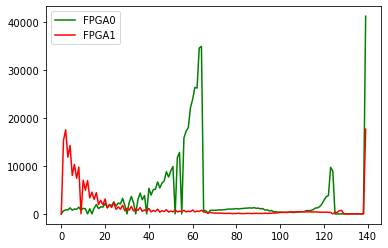

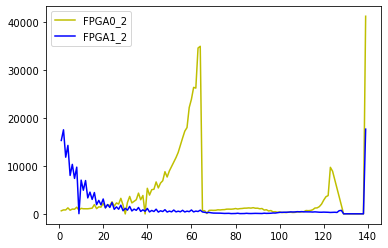

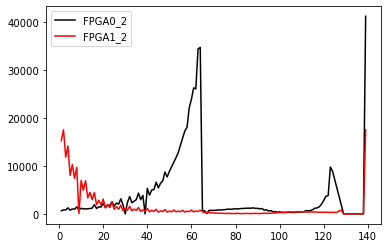

In [35]:
import matplotlib.pyplot as plt

x0 = np.array(x0)
x1 = np.array(x1)
tdc = np.arange(140)

plt.figure();
plt.plot(tdc, x0*2/3564, 'g', label='FPGA0')
plt.plot(tdc, x1*2/3564, 'r', label='FPGA1')
plt.legend()


plt.figure();
plt.plot(x1_2.index, x1_2['BX_COUNTER']*2/3564, 'y', label='FPGA0_2')
plt.plot(x2_2.index, x2_2['BX_COUNTER']*2/3564, 'b', label='FPGA1_2')
plt.legend()

plt.figure();
plt.plot(x1_2.index, x1_2['int'], 'black', label='FPGA0_2')
plt.plot(x2_2.index, x2_2['int'], 'r', label='FPGA1_2')
plt.legend()

## 8.

In [22]:
noise0 = x1_2['BX_COUNTER'].nlargest(3)
noise1 = x2_2['BX_COUNTER'].nlargest(3)
print(noise0)
print(noise1)

TDC_CHANNEL
139    82572840
64     70054376
63     69473202
Name: BX_COUNTER, dtype: int64
TDC_CHANNEL
139    35524566
2      35367330
1      30892206
Name: BX_COUNTER, dtype: int64


## 9.

In [23]:
orbit0 = fpga0['ORBIT_CNT'].unique()
orbit1 = fpga1['ORBIT_CNT'].unique()

mask0_139 = fpga0.mask(fpga0['TDC_CHANNEL'] == 139)
mask1_139 = fpga1.mask(fpga1['TDC_CHANNEL'] == 139)

both0 = mask0_139['ORBIT_CNT'].unique()
both0 = mask1_139['ORBIT_CNT'].unique()